Enter the Grid Size: The Number of Squares Along One Side of a Square Grid, 5 or 10, say ---  5


The Size of the Hypothetical Spatial System is 5 Zones by 5 Zones, Making 25 in All



Enter the Parameter Value on Distance - beta - that You Think Best Fits the Data: It should be greater than 0 and less than 1 ----  0.5



Zone 	 ObsO 	 ObsD 	 PredO 	 PredD

1 	 27.01 	 23.45 	 19.73 	 17.13
2 	 36.74 	 26.87 	 32.79 	 23.87
3 	 38.80 	 34.20 	 37.52 	 32.49
4 	 34.79 	 42.89 	 32.30 	 38.78
5 	 34.25 	 41.16 	 26.61 	 31.16
6 	 42.30 	 41.89 	 38.16 	 37.20
7 	 43.15 	 41.59 	 47.84 	 45.28
8 	 42.17 	 60.72 	 50.44 	 71.03
9 	 41.08 	 40.32 	 46.54 	 44.77
10 	 50.70 	 40.07 	 47.28 	 36.83
11 	 30.05 	 42.94 	 29.13 	 40.68
12 	 33.13 	 41.37 	 39.35 	 48.11
13 	 66.78 	 60.56 	 84.72 	 75.90
14 	 47.72 	 51.06 	 56.83 	 60.51
15 	 34.24 	 48.43 	 33.34 	 46.94
16 	 52.14 	 44.72 	 47.58 	 40.49
17 	 43.71 	 53.96 	 48.46 	 59.40
18 	 42.54 	 43.09 	 49.67 	 50.57
19 	 53.15 	 36.30 	 57.96 	 40.21
20 	 37.16 	 30.10 	 33.17 	 27.32
21 	 30.83 	 27.52 	 22.86 	 20.65
22 	 41.43 	 35.46 	 36.87 	 31.99
23 	 33.62 	 26.89 	 31.34 	 25.54
24 	 28.48 	 34.72 	 24.89 	 31.08
25 	 34.02 	 29.71 	 24.61 	 22.08


Correlation  	 0.933


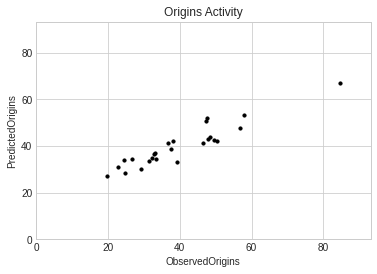

Correlation  	 0.953


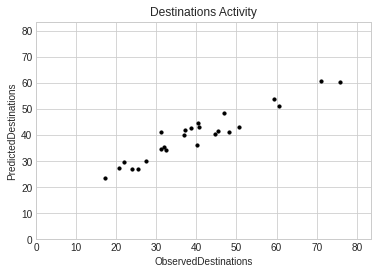

Correlation  	 0.890


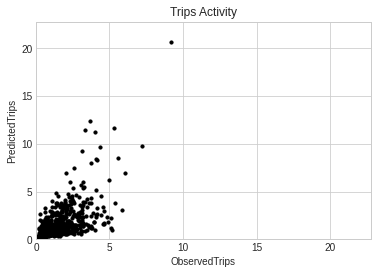

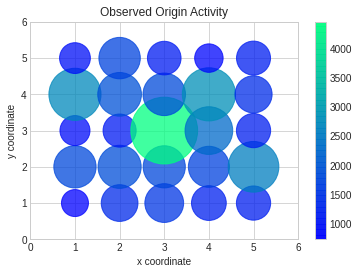

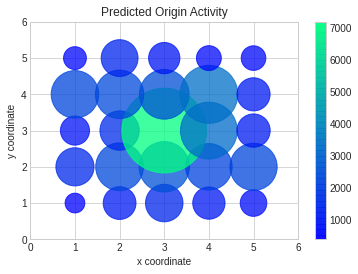

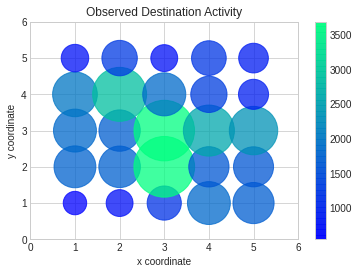

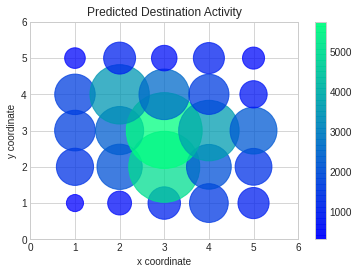

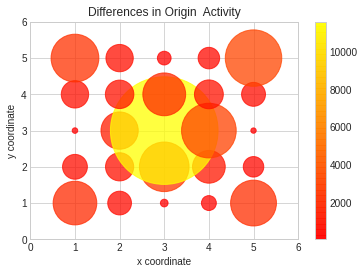

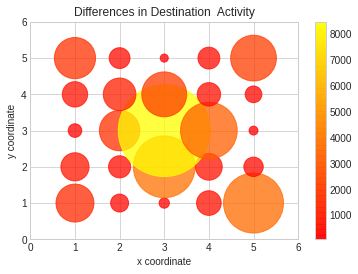

The model and its outputs are now complete



In [3]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random
import numpy as np
plt.style.use('seaborn-whitegrid')

#Defined Functions: for Plotting observed and Predicted Model Results on the Grid, 
#the Friction of Distance Parameter, and the Location-Interactions Plots for Correlations

def friction(parameter,dis):
    frict=math.exp(parameter*dis)
    return frict

def locintplot(obs,pred,activities):
    maxo=np.max(obs); maxop=np.max(pred)
    if maxo>maxop:
        maxv=maxo
    else:
        maxv=maxop
    maxv=maxv*(1.1)
    plt.axis([0,maxv,0,maxv])
    plt.xlabel("Observed" + activities)
    plt.ylabel("Predicted" + activities)
    plt.title(activities + " Activity")
    plt.scatter(pred, obs, s=10,c='black')
    rO = np.corrcoef(pred, obs)
    print("Correlation ","\t","{:.3f}".format(rO[0,1]))
    return

def scattergraph(soutput,dataname,colours):
    plt.show()
    sizes=soutput**2
    plt.axis([0,n,0,n])
    plt.xlabel("x coordinate")
    plt.ylabel("y coordinate")
    plt.title(dataname + ' Activity')
    plt.scatter(xcoord, ycoord, c=sizes, s=sizes, alpha=0.75, cmap=colours)
    return

#Defining the Hypothetical Spatial System

xcoord=np.array([])
ycoord=np.array([])

n=input("Enter the Grid Size: The Number of Squares Along One Side of a Square Grid, 5 or 10, say --- ")
n=int(n); N=n*n
print("The Size of the Hypothetical Spatial System is",n, "Zones by", n,"Zones, Making", N,"in All")
print()

distance=np.full((N,N), 1.0)

n=n+1
for y in range(1,n):
    for x in range(1,n):
        xcoord = np.append(xcoord,[x]) 
        ycoord = np.append(ycoord,[y])

ij=0
for i in range (0,N):
    xi=xcoord[i]
    yi=ycoord[i]
    for j in range (0,N):
        ij=ij+1
        xj=xcoord[j]
        yj=ycoord[j]
        dis=math.sqrt((((xi-xj)**2)+((yi-yj)**2)))
        distance[i][j]=dis
        if distance[i][j]==0:
            distance[i][j]=0.5
        #print(i+1,j+1,distance[i][j])

#Defining the Hypothetical Trip, Origin and Destination Data

tobs=np.full((N,N), 1.0)
origins=np.full((N),1.0)
destinations=np.full((N),1.0)
differences=np.full((N),1.0)

for i in range (0,N):
    for j in range (0,N):
        tobs[i][j]=1.0/(distance[i][j]*(0.1+random.rand()))
Tobs = np.sum(tobs)
for i in range (0,N):
    for j in range(0,N):
        ij=ij+1
        tobs[i,j]=1000*(tobs[i][j]/Tobs)

origins = np.sum(tobs, axis = 1)
destinations = np.sum(tobs, axis = 0)

To=np.sum(origins) 
Td=np.sum(destinations)
Tobs = np.sum(tobs)

#Defining and Running th Unconstrained Gravity Model

beta=input("Enter the Parameter Value on Distance - beta - that You Think Best Fits the Data: It should be greater than 0 and less than 1 ---- ")
beta=float(beta)
print()
trips=np.full((N,N),1.0)
OPred=np.full((N),1.0)
DPred=np.full((N), 1.0)
trips1=np.full((N,N),1.0)
tobs1=np.full((N,N),1.0)

total=1000
for i in range(0,N):
    for j in range(0,N):
        trips[i][j]=origins[i]*destinations[j]/(friction(beta, distance[i][j]))
Ttrip=np.sum(trips)
for i in range(0,N):
    for j in range(0,N):
        trips[i][j]=total*((origins[i]*destinations[j])/(friction(beta, distance[i][j])))/Ttrip 

#Printing the Predictions

OPred = np.sum(trips, axis = 1)
DPred = np.sum(trips, axis = 0)

print("Zone","\t","ObsO","\t","ObsD","\t","PredO","\t","PredD")
print()
for i in range(0,N):
    print(i+1, "\t","{:.2f}".format(origins[i]), "\t","{:.2f}".format(destinations[i]),"\t","{:.2f}".format(OPred[i]),"\t","{:.2f}".format(DPred[i]))

#Comparing Observed with Predicted Origin Activity Using Scattergraphs

input()
locintplot(origins, OPred, 'Origins')
plt.savefig('OriginOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

input()
locintplot(destinations, DPred, 'Destinations')
plt.savefig('DestOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

input()
locintplot(tobs, trips, 'Trips')
plt.savefig('TripOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

rng = np.random.RandomState(0)
colors = rng.rand(N)

#Plotting Observed and Predicted Locations on the Hypothetical Grid

input()
scattergraph(origins, 'Observed Origin','winter')
plt.savefig('ObsOrigins.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

input()
scattergraph(OPred, 'Predicted Origin','winter')
plt.savefig('PredOrigins.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

input()
scattergraph(destinations, 'Observed Destination','winter')
plt.savefig('ObsDestinations.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

input()
scattergraph(DPred, 'Predicted Destination','winter')
plt.savefig('PredDestinations.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

#Measuring the Differences Between Predictions and Observations

for i in range(0,N):
    differences[i]=(origins[i]-OPred[i])*6
input()

scattergraph(differences, 'Differences in Origin ','autumn')
plt.savefig('Odifferences.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

for i in range(0,N):
    differences[i]=(destinations[i]-DPred[i])*6
input()
scattergraph(differences, 'Differences in Destination ','autumn')
plt.savefig('Ddifferences.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

print("The model and its outputs are now complete")
print()





